In [8]:
import pandas as pd #To handle Data
import string #to handle punct
from nltk.corpus import stopwords #for fillerwords or stopwords
import nltk


In [9]:
nltk.downloads('stopwords')

AttributeError: module 'nltk' has no attribute 'downloads'

In [12]:
df_spam = pd.read_csv('NB.csv', encoding = 'ISO-8859-1')

In [40]:
df_spam.shape

(5559, 2)

In [5]:
df_spam.shape

(5559, 2)

<AxesSubplot:xlabel='type', ylabel='count'>

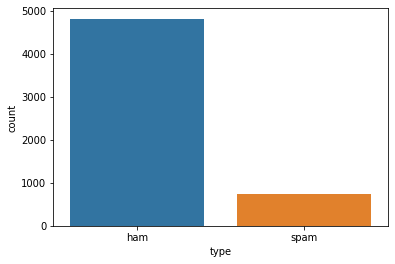

In [14]:
import seaborn as sns
sns.countplot(df_spam['type'])

In [15]:
df_spam['type'].value_counts()

ham     4812
spam     747
Name: type, dtype: int64

In [19]:
def message_text_process(mess):
    no_punctuation = [char for char in mess if char not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return [word for word in no_punctuation.split() if word.lower() 
            not in stopwords.words('english')]

In [17]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [18]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [20]:
df_spam['text'].head(5).apply(message_text_process)

0                         [Hope, good, week, checking]
1                                [Kgive, back, thanks]
2                                     [also, cbe, pay]
3    [complimentary, 4, STAR, Ibiza, Holiday, å£100...
4    [okmail, Dear, Dave, final, notice, collect, 4...
Name: text, dtype: object

In [21]:
from sklearn.feature_extraction.text import CountVectorizer #DTM

In [25]:
bag_words = CountVectorizer(analyzer = message_text_process).fit(df_spam['text'])

In [26]:
print(bag_words)

CountVectorizer(analyzer=<function message_text_process at 0x7f5e368ccc20>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


In [27]:
print(len(bag_words.vocabulary_))

11356


In [28]:
message_bagwords = bag_words.transform(df_spam['text'])

In [29]:
print(message_bagwords)

  (0, 2254)	1
  (0, 5414)	1
  (0, 6847)	1
  (0, 10943)	1
  (1, 2489)	1
  (1, 4865)	1
  (1, 10332)	1
  (2, 4611)	1
  (2, 5352)	1
  (2, 8719)	1
  (3, 262)	1
  (3, 605)	1
  (3, 1296)	1
  (3, 2244)	1
  (3, 2329)	1
  (3, 2588)	1
  (3, 3523)	1
  (3, 4066)	1
  (3, 5331)	1
  (3, 5554)	1
  (3, 5601)	1
  (3, 7847)	1
  (3, 8343)	1
  (3, 11304)	1
  (4, 224)	1
  :	:
  (5557, 509)	1
  (5557, 965)	1
  (5557, 1721)	1
  (5557, 1777)	1
  (5557, 1778)	1
  (5557, 2403)	1
  (5557, 2404)	1
  (5557, 3278)	1
  (5557, 3397)	2
  (5557, 3486)	1
  (5557, 4454)	1
  (5557, 7076)	1
  (5557, 7594)	1
  (5557, 7688)	1
  (5557, 8015)	1
  (5557, 9120)	1
  (5557, 9755)	1
  (5557, 10077)	1
  (5557, 10637)	1
  (5557, 10715)	1
  (5557, 11121)	1
  (5558, 3627)	1
  (5558, 5243)	1
  (5558, 5867)	1
  (5558, 6606)	1


In [30]:
print(message_bagwords)

  (0, 2254)	1
  (0, 5414)	1
  (0, 6847)	1
  (0, 10943)	1
  (1, 2489)	1
  (1, 4865)	1
  (1, 10332)	1
  (2, 4611)	1
  (2, 5352)	1
  (2, 8719)	1
  (3, 262)	1
  (3, 605)	1
  (3, 1296)	1
  (3, 2244)	1
  (3, 2329)	1
  (3, 2588)	1
  (3, 3523)	1
  (3, 4066)	1
  (3, 5331)	1
  (3, 5554)	1
  (3, 5601)	1
  (3, 7847)	1
  (3, 8343)	1
  (3, 11304)	1
  (4, 224)	1
  :	:
  (5557, 509)	1
  (5557, 965)	1
  (5557, 1721)	1
  (5557, 1777)	1
  (5557, 1778)	1
  (5557, 2403)	1
  (5557, 2404)	1
  (5557, 3278)	1
  (5557, 3397)	2
  (5557, 3486)	1
  (5557, 4454)	1
  (5557, 7076)	1
  (5557, 7594)	1
  (5557, 7688)	1
  (5557, 8015)	1
  (5557, 9120)	1
  (5557, 9755)	1
  (5557, 10077)	1
  (5557, 10637)	1
  (5557, 10715)	1
  (5557, 11121)	1
  (5558, 3627)	1
  (5558, 5243)	1
  (5558, 5867)	1
  (5558, 6606)	1


In [30]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(message_bagwords)

In [31]:
message_tfidf = tfidf_transformer.transform(message_bagwords)

In [32]:
print(message_tfidf.shape)
print(message_tfidf)

(5559, 11356)
  (0, 10943)	0.4379039903544475
  (0, 6847)	0.4079211665788139
  (0, 5414)	0.6229255062832731
  (0, 2254)	0.5037898676138289
  (1, 10332)	0.53343447866409
  (1, 4865)	0.3941617905371652
  (1, 2489)	0.7483876935472058
  (2, 8719)	0.5395126957976536
  (2, 5352)	0.6872527142806397
  (2, 4611)	0.486425490478287
  (3, 11304)	0.2886588513405475
  (3, 8343)	0.26016042466750977
  (3, 7847)	0.26016042466750977
  (3, 5601)	0.26016042466750977
  (3, 5554)	0.2332211897066975
  (3, 5331)	0.20699668006135605
  (3, 4066)	0.2169360073935419
  (3, 3523)	0.32915177840434773
  (3, 2588)	0.2780553934168467
  (3, 2329)	0.2953789049732685
  (3, 2244)	0.24076955349243523
  (3, 1296)	0.32915177840434773
  (3, 605)	0.147541827236046
  (3, 262)	0.32915177840434773
  (4, 8523)	0.2839777476652211
  :	:
  (5557, 10715)	0.11021052039206913
  (5557, 10637)	0.08306947846909804
  (5557, 10077)	0.2120492716727746
  (5557, 9755)	0.2417954431547904
  (5557, 9120)	0.1353368128310807
  (5557, 8015)	0.17033997

In [33]:
X = message_tfidf
y = df_spam['type']

In [34]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import neighbors
spam_detect = MultinomialNB().fit(X_train,y_train)
#spam_detect = neighbors.KNeighborsClassifier(n_neighbors=13).fit(X_train,y_train)


In [36]:
predicted = spam_detect.predict(X_test)

In [37]:
predicted

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'spam'], dtype='<U4')

In [38]:
expected = y_test

from sklearn import metrics
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       978
        spam       1.00      0.69      0.81       134

    accuracy                           0.96      1112
   macro avg       0.98      0.84      0.90      1112
weighted avg       0.96      0.96      0.96      1112

[[978   0]
 [ 42  92]]


In [39]:
 from sklearn.metrics import accuracy_score

accuracy_score(y_test,predicted)

0.9622302158273381